# Data Capture and Preparation Pipeline

This notebook presents an end-to-end data capture and preparation workflow,
focusing on data quality, cleaning, transformation, and preparation for
downstream analytical tasks.

The project reflects a real-world analytical process rather than an academic
exercise.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
PATH = "######"

In [ ]:
df_planeta = (pd.read_csv(PATH+'Planetas.csv',sep=',',encoding='latin-1')
              .dropna(how='all')
             )

In [5]:
#Cargarmos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Cargamos el Dataset
from google.colab import files
uploaded = files.upload()
df_stroke = pd.read_csv("Stroke_Prediction_Dataset.csv")

# Mostramos las primeras filas
df_stroke.head()

Saving Stroke_Prediction_Dataset.csv to Stroke_Prediction_Dataset.csv


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**- El dataset ha sido cargado correctamente en un DataFrame de pandas denominado df_stroke, manteniendo las columnas originales proporcionadas en el fichero CSV.**

In [7]:
# Dimensionamos el dataset y mostramos su información general
df_stroke.shape
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**- El Stroke Prediction Dataset es un conjunto de datos de carácter clínico que contiene información demográfica, hábitos de vida y variables médicas de pacientes, con el objetivo de analizar factores asociados a la aparición de ictus. El dataset está compuesto por variables numéricas y categóricas e incluye una variable objetivo binaria (stroke) que indica si el individuo ha sufrido, o no, un ictus. Entre las variables se encuentran la edad, el nivel medio de glucosa, el índice de masa corporal (BMI), antecedentes médicos y hábitos como el consumo de tabaco, lo que lo hace adecuado para tareas de análisis predictivo en el ámbito de la salud.**

**- Dado que la variable objetivo stroke es binaria y toma valores 0 o 1 en función de si el individuo ha sufrido o no un ictus, el problema que se puede abordar con este dataset es un problema de clasificación. El objetivo sería predecir la ocurrencia de un ictus a partir de variables demográficas, clínicas y de estilo de vida, una vez aplicado el correspondiente proceso de ingeniería de características.**

**- Tipos de variables del dataset:**

-- Variables numéricas:


*   age (float): edad del individuo.
*   avg_glucose_level (float): nivel medio de glucosa en sangre.
*   bmi (float): índice de masa corporal.
*   hypertension (int, binaria): indica si el individuo padece hipertensión (0 = no, 1 = si).
*   heart_disease (int, binaria): indica si el individuo tiene enfermedad cardíaca (0 = no, 1 = si).

-- Variables categóricas:

*   gender: género del individuo.
*   ever_married: indica si el individuo ha estado casado alguna vez.
*   work_type: tipo de ocupación.
*   Residence_type: tipo de residencia (urbana o rural).
*   smoking_status: estado de consumo de tabaco.

-- Variable indicadora (no predictiva):

*   id: identificador único del individuo (no se considera característica).



Cabe destacar que la variable id actúa únicamente como identificador y no se considera una característica predictiva. La variable de respuesta es stroke, de tipo binario, que indica si el individuo ha sufrido (o no) un ictus.

In [8]:
# Seleccionamos variables numéricas y métricas descriptivas
num_vars = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']
df_stroke[num_vars].describe()


,age,avg_glucose_level,bmi,hypertension,heart_disease,stroke
count,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.893237,0.097456,0.054012,0.048728
std,22.612647,45.283560,7.854067,0.296607,0.226063,0.215320
min,0.080000,55.120000,10.300000,0.000000,0.000000,0.000000
25%,25.000000,77.245000,23.500000,0.000000,0.000000,0.000000
50%,45.000000,91.885000,28.100000,0.000000,0.000000,0.000000
75%,61.000000,114.090000,33.100000,0.000000,0.000000,0.000000
max,82.000000,271.740000,97.600000,1.000000,1.000000,1.000000


In [9]:
# Obtenemos las tablas de frecuencias y proporciones
cat_vars = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for var in cat_vars:
    print(f"\nFrecuencias de {var}")
    print(df_stroke[var].value_counts())
df_stroke[var].value_counts(normalize=True)



Frecuencias de gender
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Frecuencias de ever_married
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

Frecuencias de work_type
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Frecuencias de Residence_type
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

Frecuencias de smoking_status
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


,proportion
smoking_status,
never smoked,0.370254
Unknown,0.302153
formerly smoked,0.173190
smokes,0.154403


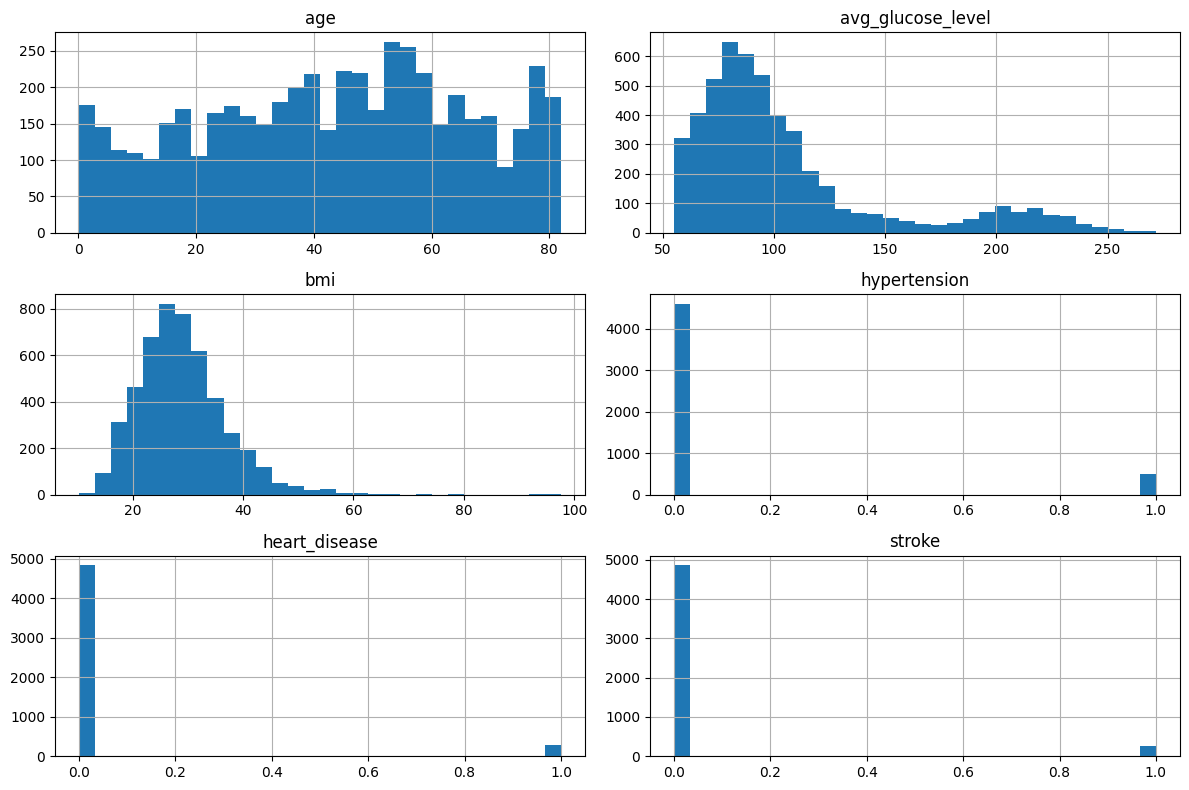

In [10]:
# Mostramos histogramas para variables numéricas
df_stroke[num_vars].hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

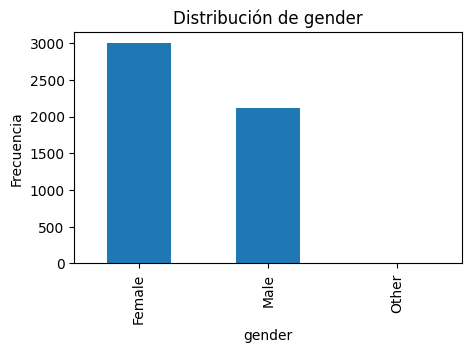

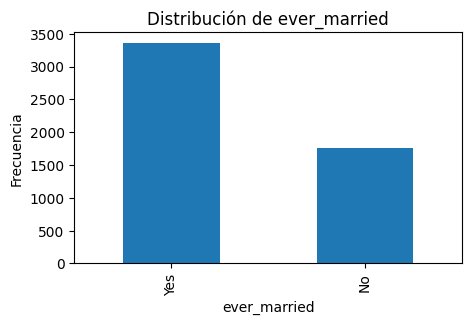

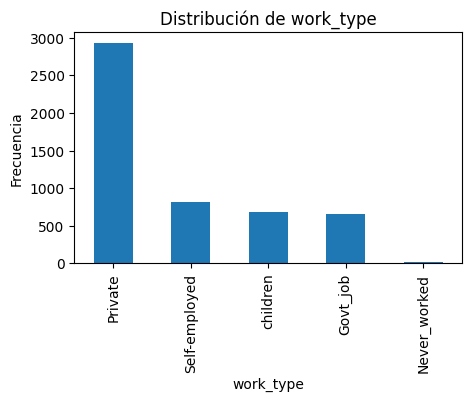

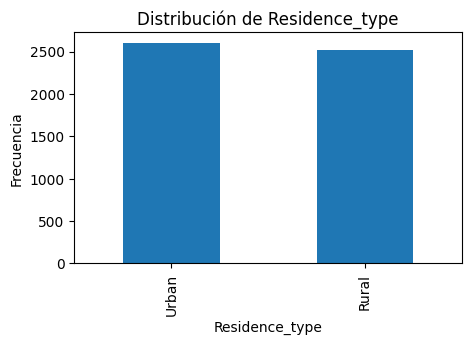

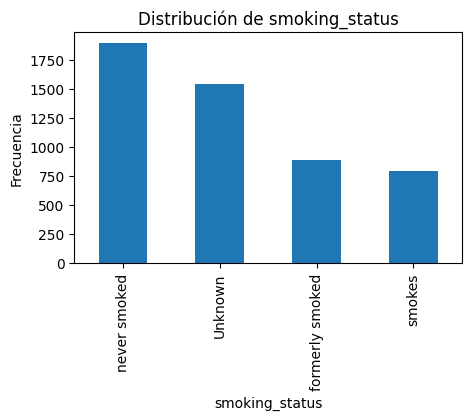

In [11]:
# Mostramos diagramas de barras para categóricas
for var in cat_vars:
    df_stroke[var].value_counts().plot(kind='bar', figsize=(5,3))
    plt.title(f'Distribución de {var}')
    plt.ylabel('Frecuencia')
    plt.show()


**El análisis descriptivo y gráfico de las variables numéricas muestra que la mayoría de las distribuciones no siguen una distribución normal, presentando asimetrías y colas pronunciadas.**

- La variable age presenta una distribución amplia, con valores comprendidos entre edades muy tempranas y edades avanzadas, y una mediana situada en torno a los 45 años, lo que indica una población heterogénea en términos de edad. No se observa una concentración extrema en un único rango, aunque sí una mayor densidad en edades adultas.

- En avg_glucose_level se aprecia una clara asimetría positiva, con una concentración principal entre valores moderados y una cola larga hacia valores elevados, lo que sugiere la presencia de posibles outliers asociados a niveles anormalmente altos de glucosa. Esta característica es coherente con su posible relevancia clínica en la predicción de ictus.

- La variable bmi presenta una distribución aproximadamente unimodal, centrada alrededor de valores cercanos al sobrepeso, pero con una cola derecha extensa que incluye valores extremos. Además, se observa la presencia de valores faltantes, lo que deberá tenerse en cuenta en fases posteriores de limpieza e imputación.

- Las variables binarias hypertension, heart_disease y stroke muestran distribuciones claramente desbalanceadas, con una proporción muy superior de valores cero frente a uno. Este desequilibrio es especialmente notable en la variable objetivo stroke, lo que confirma que se trata de un problema de clasificación desbalanceada.

- En cuanto a las variables categóricas, gender presenta una ligera mayor frecuencia de mujeres, con un caso residual en la categoría “Other”. La variable ever_married muestra predominio de individuos que han estado casados, coherente con la distribución de edades observada. En work_type, la categoría Private es claramente mayoritaria, mientras que Never_worked representa un porcentaje muy reducido. Residence_type está prácticamente equilibrada entre zonas urbanas y rurales.

- Por último, smoking_status presenta una proporción relevante de valores Unknown, lo que constituye una particularidad importante del dataset y sugiere la necesidad de un tratamiento específico de esta categoría.

En conjunto, el análisis descriptivo revela asimetrías, valores extremos, variables desbalanceadas y presencia de datos faltantes, aspectos clave que justifican la aplicación de técnicas de ingeniería de características antes de abordar cualquier proceso de modelado según hemos estudiado.**

_Comentarios:_

**El dataset presenta datos faltantes en algunas variables, concretamente en la variable bmi.
Para el tratamiento de los valores faltantes se opta por una imputación estadística, en lugar de eliminar observaciones, con el objetivo de no reducir el tamaño muestral ni introducir sesgos adicionales en un problema de clasificación ya desbalanceado.
Dado que bmi es una variable numérica contínua y su distribución no es estrictamente normal, se emplea la mediana como estadístico de imputación, por ser más robusta frente a valores extremos.**

In [13]:
# Porcentaje de valores faltantes por variable
missing_percent = df_stroke.isnull().mean() * 100
missing_percent.sort_values(ascending=False)

,0
bmi,3.933464
id,0.000000
age,0.000000
gender,0.000000
hypertension,0.000000
heart_disease,0.000000
work_type,0.000000
ever_married,0.000000
Residence_type,0.000000
avg_glucose_level,0.000000


**Podemos observar que únicamente la variable bmi presenta los valores faltantes, con un porcentaje muy reducido (3.9334) respecto al total de observaciones, mientras que el resto de variables no contienen datos ausentes.**

In [14]:
# Hallamos la imputación de valores faltantes en bmi con la mediana y comprobamos
median_bmi = df_stroke['bmi'].median()
df_stroke['bmi'] = df_stroke['bmi'].fillna(median_bmi)
df_stroke.isnull().sum()


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


**Los valores faltantes de la variable bmi han sido imputados utilizando la mediana. Tras la imputación, el dataset no presenta valores nulos en ninguna de sus variables. El procedimiento se ha realizado mediante una asignación directa para evitar problemas asociados a asignaciones encadenadas en pandas.**

_Comentarios:_

**Las variables categóricas del dataset han sido codificadas en función de su naturaleza.**

**Las variables nominales (gender, work_type, Residence_type, smoking_status) se han transformado mediante One-Hot Encoding, ya que no presentan un orden intrínseco entre categorías y esta técnica evita introducir relaciones artificiales.**

**Las variables binarias (ever_married, hypertension, heart_disease) se han mantenido como variables numéricas binarias, dado que ya representan adecuadamente la información y no requieren transformación adicional.**

In [16]:
# Efectuamos una copia del dataset para transformaciones
df_encoded = df_stroke.copy()

# Codificación binaria
df_encoded['ever_married'] = df_encoded['ever_married'].map({'Yes': 1, 'No': 0})

# One-Hot Encoding para variables nominales
categorical_cols = ['gender', 'work_type', 'Residence_type', 'smoking_status']
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)


In [17]:
# Transformación logarítmica
df_encoded['log_avg_glucose_level'] = np.log1p(df_encoded['avg_glucose_level'])


**Dado que la variable avg_glucose_level presenta una distribución claramente asimétrica y valores extremos, se ha aplicado una transformación logarítmica con el objetivo de reducir la asimetría y estabilizar la varianza.**

**El resto de variables numéricas no requieren transformación adicional al no presentar desviaciones severas de normalidad.**

In [18]:
from sklearn.preprocessing import StandardScaler

# Escogemos las variables numéricas a escalar
num_cols = ['age', 'bmi', 'avg_glucose_level', 'log_avg_glucose_level']

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])


**Finalmente, aplicamos un proceso de estandarización sobre las variables numéricas del dataset, con el objetivo de homogeneizar las escalas y evitar que variables con mayor magnitud dominen el proceso de modelado.**

**La estandarización se ha realizado utilizando StandardScaler, dejando las variables con media cero y desviación estándar unitaria.**

In [20]:
### funciones análogas para resolver problemas de regresión:

from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Función - obtener los modelos
def get_models():
    models = dict()
    for i in range(2, 10):
        rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=i)
        model = RandomForestRegressor(random_state=44)
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# Función - evaluar los modelos
def evaluate_model(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.3, random_state=44)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    scores = mean_absolute_percentage_error(y_test, y_pred)
    return scores

**Previamente a la aplicación de métodos de selección de características, analizamos la posible existencia de variables redundantes.**

**En este análisis se observa que las variables avg_glucose_level y log_avg_glucose_level contienen la misma información, siendo la segunda una transformación de la primera. Por lo tanto, ambas presentan una alta dependencia y no resulta adecuado mantenerlas simultáneamente en el modelo.**

**En consecuencia, se conservará la variable transformada (log_avg_glucose_level), al presentar mejores propiedades estadísticas.**

In [22]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Definimos X e y
X = df_encoded.drop(columns=['stroke'])
y = df_encoded['stroke']

# Aplicamos filtro
selector = SelectKBest(score_func=mutual_info_classif, k='all')
selector.fit(X, y)

# Ranking de características
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': selector.scores_
}).sort_values(by='MI_Score', ascending=False)

feature_scores

,Feature,MI_Score
1,age,0.038077
6,bmi,0.011396
3,heart_disease,0.009995
10,work_type_Private,0.006939
8,gender_Other,0.006133
5,avg_glucose_level,0.005960
17,log_avg_glucose_level,0.005932
0,id,0.005198
2,hypertension,0.004948
12,work_type_children,0.004394


**Para la selección de características basada en filtros utilizamos el criterio de Información Mutua, adecuado para problemas de clasificación, ya que permite cuantificar la dependencia estadística entre cada variable explicativa y la variable objetivo (stroke) sin asumir relaciones lineales.**

**El ranking obtenido muestra que la variable age presenta claramente la mayor puntuación de información mutua, lo que indica que es la característica individual con mayor capacidad explicativa respecto a la ocurrencia de un ictus.**

**En un segundo nivel de relevancia aparecen variables como ever_married, bmi, hypertension y avg_glucose_level, que aportan información adicional aunque de forma más moderada.**

**Por el contrario, algunas variables categóricas codificadas mediante one-hot encoding, como Residence_type_Urban, gender_Other o work_type_Never_worked, presentan valores de información mutua muy bajos o nulos, lo que sugiere una contribución limitada al problema de clasificación cuando se consideran de forma individual.**

**Estos resultados permiten identificar un subconjunto de características potencialmente relevantes y evidencian la presencia de variables con escasa capacidad discriminativa, que podrán ser candidatas a exclusión en fases posteriores del proceso de selección de características.**
**

**Cabe destacar que el método de filtros evalúa las variables de forma individual, por lo que una baja puntuación no implica necesariamente irrelevancia en combinación con otras características, motivo por el cual estos resultados se complementarán posteriormente con métodos wrapper.**

In [23]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Modelo base
model = RandomForestClassifier(random_state=44)

# RFE seleccionando de 10 características
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X, y)

# Características seleccionadas
selected_features = X.columns[rfe.support_]
selected_features


Index(['id', 'age', 'hypertension', 'avg_glucose_level', 'bmi', 'gender_Male',
       'work_type_Private', 'Residence_type_Urban',
       'smoking_status_never smoked', 'log_avg_glucose_level'],
      dtype='object')

**Para la selección de características basada en métodos wrapper se ha utilizado el algoritmo Recursive Feature Elimination (RFE), que permite seleccionar de forma iterativa el subconjunto de variables que maximiza el rendimiento del modelo.**

**Dado que el problema planteado es de clasificación, se ha empleado un Random Forest Classifier como modelo base, ya que es robusto frente a relaciones no lineales y adecuado para datasets con variables heterogéneas.**

**El procedimiento consiste en entrenar el modelo con distintos subconjuntos de características y evaluar su rendimiento, eliminando progresivamente aquellas variables que aportan menor información al modelo. El criterio de parada se establece cuando la inclusión de nuevas características no produce una mejora significativa del rendimiento, en línea con lo expuesto en la teoría de la asignatura.**

**Este enfoque permite complementar los resultados obtenidos mediante filtros, teniendo en cuenta la interacción entre variables y el comportamiento del modelo final.**


**La comparación entre los métodos basados en filtros y los métodos wrapper permite extraer conclusiones complementarias sobre la relevancia de las características del dataset.**

**En primer lugar, observamos una elevada coherencia entre ambos enfoques en variables como age, hypertension, avg_glucose_level, bmi y la variable transformada log_avg_glucose_level, que presentan relevancia tanto individual (filtros) como conjunta (wrapper). Este resultado refuerza la importancia de estas características en el problema de clasificación planteado.**

**Por otro lado, el método wrapper mantiene algunas variables categóricas codificadas mediante One-Hot Encoding que presentaban baja información mutua individual, como gender_Male, Residence_type_Urban, work_type_Private o smoking_status_never smoked. Este hecho pone de manifiesto que, aunque estas variables no aportan información relevante de forma aislada, sí pueden contribuir al rendimiento del modelo cuando se consideran en combinación con otras características.**

**Podemos destacar el caso de la variable id, que, pese a ser seleccionada por el método wrapper, no posee significado explicativo desde el punto de vista del dominio del problema, por lo que se propone su exclusión final siguiendo un criterio de interpretabilidad y buenas prácticas en modelado.**

**En conjunto, se propone mantener las variables seleccionadas por el método wrapper con excepción de id, priorizando un equilibrio entre capacidad predictiva, interpretabilidad y reducción de la complejidad del modelo.**


_Comentarios:_

In [26]:
df_stroke_model = df_encoded.drop(columns=['id', 'avg_glucose_level'], errors='ignore')

# 1) Separamos X e y
X = df_stroke_model.drop(columns=['stroke', 'id'], errors='ignore')
y = df_stroke_model['stroke']

# Hacemos One-Hot Encoding automático de todas las categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

# Verificamos que todo es numérico para que no salga ningún error
X_encoded.dtypes.value_counts()


,count
bool,10
float64,3
int64,3


In [27]:
# Aplicamos PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_std = scaler.fit_transform(X_encoded)

pca = PCA()
X_pca = pca.fit_transform(X_std)

X_pca.shape

(5110, 16)

**PCA (Análisis de Componentes Principales), aplicado tras codificación One-Hot y estandarización (StandardScaler), para trabajar sobre variables comparables en escala. Tenemos en cuenta que PCA es sensible a la escala de las variables y requiere que todas contribuyan de forma comparable al cálculo de las componentes principales**

**Tras aplicar PCA sobre el conjunto de datos, se obtiene un máximo de 16 componentes principales, correspondientes al número de variables explicativas tras la codificación.**

**Analizando la varianza explicada acumulada, se observa que:**

- Con 9 componentes principales se alcanza aproximadamente un 82,7 % de la varianza explicada.

- A partir de este punto, el incremento de varianza explicada por cada componente adicional es progresivamente menor.

**Por este motivo, se considera adecuado retener las primeras 9 componentes, ya que permiten capturar una proporción elevada de la información original del dataset, reduciendo la dimensionalidad y el ruido sin una pérdida significativa de información relevante.**

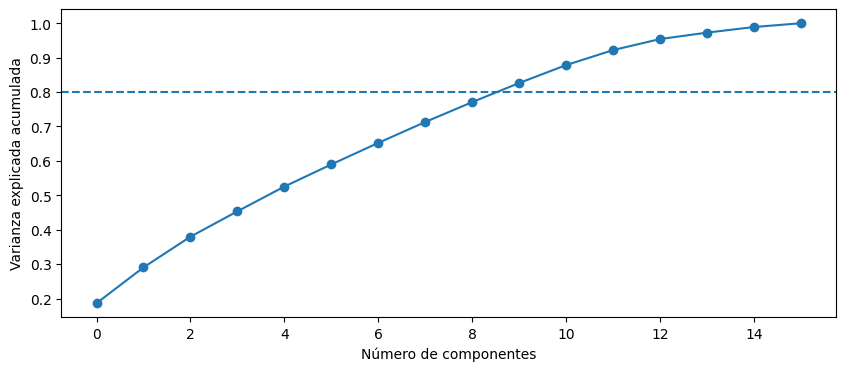

array([0.18654216, 0.29059061, 0.3798346 , 0.45360454, 0.52546379,
       0.58977902, 0.65246437, 0.71310389, 0.77084051, 0.82636464,
       0.87842923, 0.92203804, 0.95405205, 0.97267583, 0.98899704,
       1.        ])

In [28]:
import numpy as np
import matplotlib.pyplot as plt

var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(10,4))
plt.plot(cum_var_exp, marker='o')
plt.axhline(0.80, linestyle='--')
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.show()

cum_var_exp


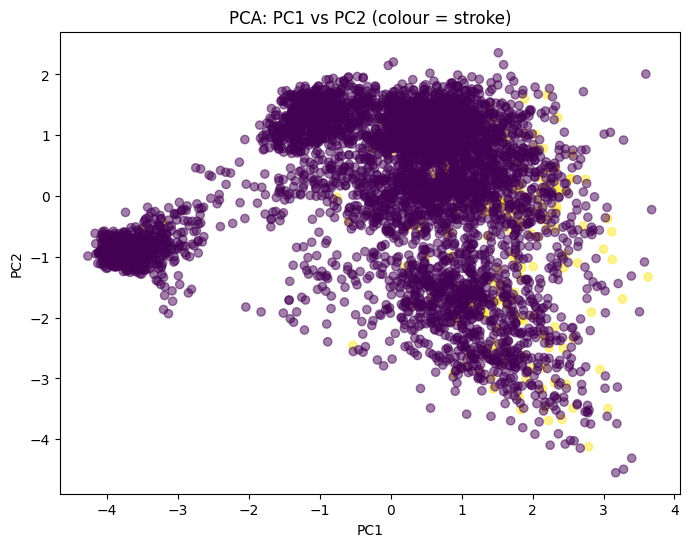

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: PC1 vs PC2 (colour = stroke)")
plt.show()


**En la figura se representa la proyección del dataset sobre las dos primeras componentes principales (PC1 y PC2), codificando los puntos según la variable objetivo stroke.**

**A partir de la visualización se observa que:**

- La mayoría de las observaciones pertenecen a la clase stroke = 0, lo que refleja claramente el desbalanceo del dataset, ya conocido en este problema.

- Los casos con stroke = 1 aparecen dispersos y solapados con los de la clase mayoritaria, sin formar un clúster claramente diferenciado.

- No se aprecia una frontera lineal ni una separación evidente entre clases en el espacio definido por PC1 y PC2.

- Existen algunas regiones donde la densidad de casos con stroke = 1 es ligeramente mayor (zonas con valores altos de PC1 y valores negativos de PC2), pero estas regiones siguen compartiendo espacio con numerosos casos de la clase negativa.

**Esta representación indica que, aunque las dos primeras componentes principales capturan una parte relevante de la varianza global del dataset, no son suficientes para discriminar la variable objetivo de forma clara. Esto es coherente con la naturaleza del problema, donde la aparición de un ictus depende de múltiples factores y relaciones no lineales que no quedan completamente reflejadas en solo dos componentes.**

**En consecuencia, PCA resulta útil como herramienta de exploración y reducción de dimensionalidad, pero no garantiza por sí sola una separación efectiva de las clases en este contexto.**

_Comentarios:_

Breves conclusiones o comentarios de los resultados obtenidos en este ejercicio

**A lo largo de este ejercicio se ha desarrollado un flujo completo de ingeniería de características aplicado a un problema real de clasificación, lo que ha permitido comprender cómo cada decisión sobre los datos influye directamente en su calidad y utilidad posterior. El análisis exploratorio ha puesto de manifiesto aspectos clave del dataset, como la presencia de distribuciones claramente asimétricas, valores extremos y un fuerte desbalanceo de la variable objetivo (stroke), elementos que condicionan cualquier aproximación predictiva y justifican la necesidad de un preprocesado cuidadoso.**

**Las fases de tratamiento de valores faltantes, codificación de variables categóricas y transformación de variables numéricas nos han permitido obtener un conjunto de datos coherente y numéricamente consistente. La selección de características, tanto mediante filtros como mediante métodos wrapper, ha mostrado resultados alineados, destacando variables como la edad, el IMC, la hipertensión y el nivel medio de glucosa como las más informativas, lo que refuerza la interpretación clínica del problema.**

**Finalmente, se observa que la reducción de dimensionalidad mediante PCA ha evidenciado que, aunque es posible concentrar gran parte de la varianza en un número reducido de componentes, la separación entre clases sigue siendo limitada, lo que sugiere que el reto del problema no reside únicamente en la dimensionalidad, sino en la complejidad intrínseca de los datos. En conjunto, el dataset queda correctamente preparado para etapas posteriores de modelado, con una comprensión clara de sus limitaciones y potencial.**

*- BIBLIOGRAFÍA*

*  Kuhn, M., & Johnson, K. (2019). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists.
*  Ingeniería de características. Material docente UOC.
*  Introducción a la limpieza y análisis de los datos. Material docente UOC.
